In [1]:
# Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

mlp.style.use("ggplot")
%matplotlib inline

In [2]:
# Reading in the training and testing datasets
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# Exploratory Data Analysis

In [3]:
# Looking at the head of the training data
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# Getting statistics
train.describe(include="all")

PassengerId    Survived      Pclass                         Name  \
count    891.000000  891.000000  891.000000                          891   
unique          NaN         NaN         NaN                          891   
top             NaN         NaN         NaN  Rosblom, Mr. Viktor Richard   
freq            NaN         NaN         NaN                            1   
mean     446.000000    0.383838    2.308642                          NaN   
std      257.353842    0.486592    0.836071                          NaN   
min        1.000000    0.000000    1.000000                          NaN   
25%      223.500000    0.000000    2.000000                          NaN   
50%      446.000000    0.000000    3.000000                          NaN   
75%      668.500000    1.000000    3.000000                          NaN   
max      891.000000    1.000000    3.000000                          NaN   

         Sex         Age       SibSp       Parch    Ticket        Fare  \
count    891  714.000000  891.000000  891.000000       891  891.000000   
unique     2         NaN         NaN         NaN       681         NaN   
top     male         NaN         NaN         NaN  CA. 2343         NaN   
freq     577         NaN         NaN         NaN         7         NaN   
mean     NaN   29.699118    0.523008    0.381594       NaN   32.204208   
std      NaN   14.526497    1.102743    0.806057       NaN   49.693429   
min      NaN    0.420000    0.000000    0.000000       NaN    0.000000   
25%      NaN   20.125000    0.000000    0.000000       NaN    7.910400   
50%      NaN   28.000000    0.000000    0.000000       NaN   14.454200   
75%      NaN   38.000000    1.000000    0.000000       NaN   31.000000   
max      NaN   80.000000    8.000000    6.000000       NaN  512.329200   

          Cabin Embarked  
count       204      889  
unique      147        3  
top     B96 B98        S  
freq          4      644  
mean        NaN      NaN  
std         NaN      NaN  
min         NaN      NaN  
25%         NaN      NaN  
50%         NaN      NaN  
75%         NaN      NaN  
max         NaN      NaN

In [5]:
# Examining the datatypes for the columns in our training data and looking at null counts
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Getting a percent of how much null data there is per column
round(train.isnull().sum() * 100 / len(train), 1)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64

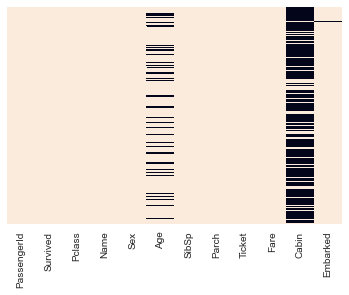

In [7]:
# Visualizing the number of missing values per column. May have to drop Cabin data or change to a more usable format due to large number of nulls
sns.set_style("whitegrid")
sns.heatmap(
    train.isnull(),
    yticklabels= False,
    cbar= False,
    cmap= "rocket_r"
)

plt.savefig("images/nulls_heatmap.PNG")

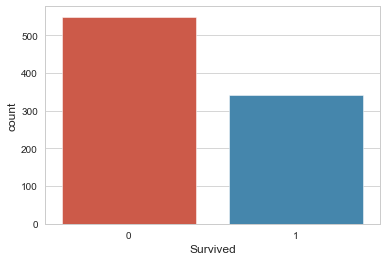

In [8]:
# Looking at how many people survived out of the entire population
sns.set_style("whitegrid")
sns.countplot(x= "Survived", data= train)
plt.savefig("images/survived_distribution.PNG")

Age  Cabin  Embarked  Fare  Name  Parch  PassengerId  Pclass  Sex  \
Survived                                                                      
0         424     68       549   549   549    549          549     549  549   
1         290    136       340   342   342    342          342     342  342   

          SibSp  Ticket  
Survived                 
0           549     549  
1           342     342

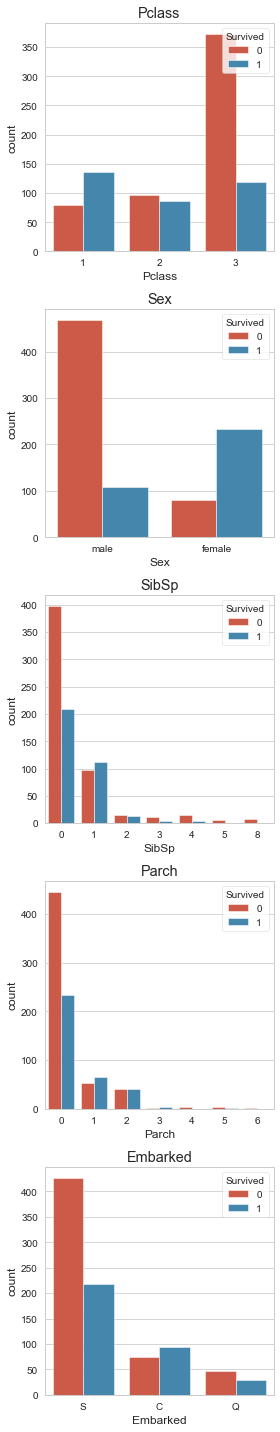

In [9]:
# Examining the count of survivors for different columns
cols = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
n_rows = 5
n_cols = 1

fig, axes = plt.subplots(n_rows, n_cols, figsize = (n_cols * 4, n_rows * 4), squeeze= False)

for r in range(0, n_rows):
    for c in range (0, n_cols):
        i = r * n_cols + c
        ax = axes[r][c]
        sns.countplot(train[cols[i]], hue= train["Survived"], ax= ax)
        ax.set_title(cols[i])
        ax.legend(title= "Survived", loc= "upper right")

plt.tight_layout()
plt.savefig("images/survivors_by_diff_col.PNG")

train.pivot_table(
    index= "Survived",
    aggfunc= "count"
)

In [10]:
# Breaking down survival rates by sex
train.groupby("Sex")[["Survived"]].mean()

Survived
Sex             
female  0.742038
male    0.188908

In [11]:
# Breaking down survival rate by sex and class
train.pivot_table("Survived", index="Sex", columns= "Pclass")

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

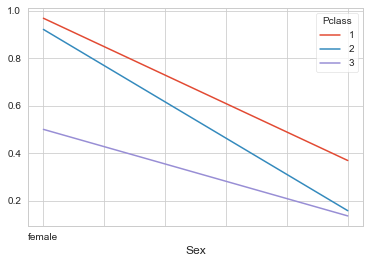

In [12]:
# Plot of survival rate by sex and class
train.pivot_table("Survived", index= "Sex", columns= "Pclass").plot()
plt.savefig("images/survivor_rate_by_sex.PNG")

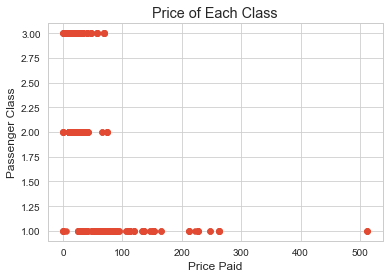

In [13]:
# Visualization of prices paid for each class
plt.scatter(
    train["Fare"],
    train["Pclass"]
)
plt.ylabel("Passenger Class")
plt.xlabel("Price Paid")
plt.title("Price of Each Class")

plt.savefig("images/price_distribution_by_class.PNG")
plt.show()

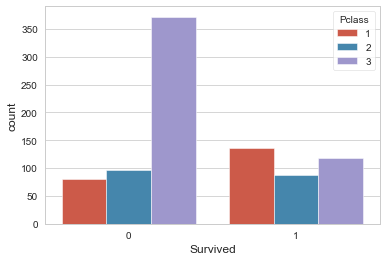

In [14]:
# Visually showing the survival rates by Pclass
sns.set_style("whitegrid")
sns.countplot(x= "Survived", hue= "Pclass", data= train)

train.pivot_table(
    values= "Survived",
    index= "Pclass"
)

plt.savefig("images/survivor_rate_by_pclass.PNG")

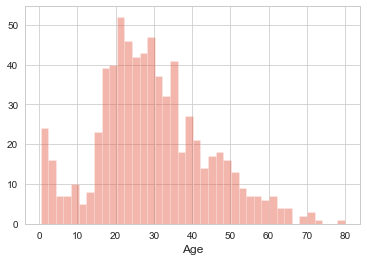

In [15]:
# Looking at distribution of the age
sns.distplot(train["Age"].dropna(), kde= False, bins= 40)
plt.savefig("images/age_distribution.PNG")

In [16]:
# Looking at survival rate by sex, age, and class
age = pd.cut(train["Age"], [0, 10, 20, 30, 40, 50, 60, 70, 80])
train.pivot_table("Survived", ["Sex", age], "Pclass")

Pclass                  1         2         3
Sex    Age                                   
female (0, 10]   0.000000  1.000000  0.500000
       (10, 20]  1.000000  1.000000  0.520000
       (20, 30]  0.952381  0.892857  0.500000
       (30, 40]  1.000000  0.941176  0.428571
       (40, 50]  0.923077  0.900000  0.000000
       (50, 60]  1.000000  0.666667       NaN
       (60, 70]  1.000000       NaN  1.000000
male   (0, 10]   1.000000  1.000000  0.363636
       (10, 20]  0.400000  0.100000  0.129630
       (20, 30]  0.473684  0.000000  0.144330
       (30, 40]  0.520000  0.115385  0.142857
       (40, 50]  0.375000  0.111111  0.090909
       (50, 60]  0.285714  0.000000  0.000000
       (60, 70]  0.000000  0.333333  0.000000
       (70, 80]  0.333333       NaN  0.000000

# Cleaning/Manipulating Data

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

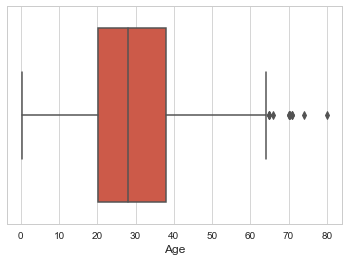

In [17]:
# Looking at median age
sns.boxplot(
    train["Age"],
)

plt.savefig("images/age_boxplot.PNG")

train["Age"].describe()

In [18]:
# Using data imputation for the missing age rows (~20%) - replacing null values with median age value of population
train["Age"].fillna(train["Age"].median(), inplace= True)
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [19]:
# Imputation is not practical with Cabin data - too much is missing - so we will drop that column
train.drop(labels= "Cabin", axis= 1, inplace= True)
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [20]:
# Dropping empty rows in Embarked column
train.dropna(inplace= True)
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


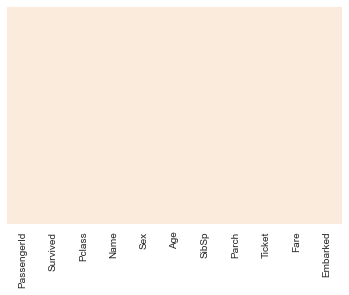

In [21]:
# Visualizing the number of missing values per column in training data after cleaning
sns.heatmap(
    train.isnull(),
    yticklabels= False,
    cbar= False,
    cmap= "rocket_r"
)

plt.savefig("images/no_nulls_heatmap.PNG")

In [22]:
# Looking at a sample of our data after the changes
train.sample(n= 5)

PassengerId  Survived  Pclass  \
85            86         1       3   
445          446         1       1   
198          199         1       3   
890          891         0       3   
869          870         1       3   

                                                  Name     Sex   Age  SibSp  \
85   Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...  female  33.0      3   
445                          Dodge, Master. Washington    male   4.0      0   
198                   Madigan, Miss. Margaret "Maggie"  female  28.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   
869                    Johnson, Master. Harold Theodor    male   4.0      1   

     Parch   Ticket     Fare Embarked  
85       0  3101278  15.8500        S  
445      2    33638  81.8583        S  
198      0   370370   7.7500        Q  
890      0   370376   7.7500        Q  
869      1   347742  11.1333        S

In [23]:
# Looking at data to see which columns have to be converted to numbers for our models
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [24]:
# Dropping columns that we believe will not contribute to survival rates
train.drop(["PassengerId", "Name", "Ticket"], axis= 1, inplace= True)

In [25]:
# Converting our categorical columns into binary values - first column is dropped as it is redundant (if column value is not true then it must be the dropped value) and storing them as series

sex = pd.get_dummies(train["Sex"])
embark = pd.get_dummies(train["Embarked"])
p_class = pd.get_dummies(train["Pclass"])

In [26]:
# Grouping together age groups and then converting these categories into binary values
ranges = [0, 10, 20, 30, 40, 50, 60, 70, np.inf]
train["Age"] = pd.cut(train["Age"], ranges)

age = pd.get_dummies(train["Age"])

In [27]:
age.head()

(0.0, 10.0]  (10.0, 20.0]  (20.0, 30.0]  (30.0, 40.0]  (40.0, 50.0]  \
0            0             0             1             0             0   
1            0             0             0             1             0   
2            0             0             1             0             0   
3            0             0             0             1             0   
4            0             0             0             1             0   

   (50.0, 60.0]  (60.0, 70.0]  (70.0, inf]  
0             0             0            0  
1             0             0            0  
2             0             0            0  
3             0             0            0  
4             0             0            0

In [28]:
# Dropping the unnecessary columns
train.drop(["Sex", "Embarked", "Age", "Pclass"], axis=1, inplace= True)

In [29]:
# Looking at our DF after dropping columns
train.head()

Survived  SibSp  Parch     Fare
0         0      1      0   7.2500
1         1      1      0  71.2833
2         1      0      0   7.9250
3         1      1      0  53.1000
4         0      0      0   8.0500

In [30]:
# Adding in our binary value columns to replace Age and Embark columns that were dropped
train = pd.concat([train, sex, embark, age, p_class], axis= 1)
train.head()

Survived  SibSp  Parch     Fare  female  male  C  Q  S  (0.0, 10.0]  \
0         0      1      0   7.2500       0     1  0  0  1            0   
1         1      1      0  71.2833       1     0  1  0  0            0   
2         1      0      0   7.9250       1     0  0  0  1            0   
3         1      1      0  53.1000       1     0  0  0  1            0   
4         0      0      0   8.0500       0     1  0  0  1            0   

   (10.0, 20.0]  (20.0, 30.0]  (30.0, 40.0]  (40.0, 50.0]  (50.0, 60.0]  \
0             0             1             0             0             0   
1             0             0             1             0             0   
2             0             1             0             0             0   
3             0             0             1             0             0   
4             0             0             1             0             0   

   (60.0, 70.0]  (70.0, inf]  1  2  3  
0             0            0  0  0  1  
1             0            0  1  0  0  
2             0            0  0  0  1  
3             0            0  1  0  0  
4             0            0  0  0  1

In [31]:
# Confirming that all of our data is a numeric type for our models
train.dtypes

Survived          int64
SibSp             int64
Parch             int64
Fare            float64
female            uint8
male              uint8
C                 uint8
Q                 uint8
S                 uint8
(0.0, 10.0]       uint8
(10.0, 20.0]      uint8
(20.0, 30.0]      uint8
(30.0, 40.0]      uint8
(40.0, 50.0]      uint8
(50.0, 60.0]      uint8
(60.0, 70.0]      uint8
(70.0, inf]       uint8
1                 uint8
2                 uint8
3                 uint8
dtype: object

Performing the same data manipulation on our testing data for our models

In [32]:
# Performing the same Age imputation method on test data
test["Age"].fillna(test["Age"].median(), inplace= True)

In [33]:
# Dropping the Cabin data in our test data set
test.drop(labels= "Cabin", axis= 1, inplace= True)

In [34]:
# Dropping empty rows in test data's Embarked column
test.dropna(inplace= True)

In [35]:
# Dropping the same columns in our test data
test.drop(["PassengerId", "Name", "Ticket"], axis= 1, inplace= True)

In [36]:
# Performing the same binary conversions on our test data
sex = pd.get_dummies(test["Sex"])
embark = pd.get_dummies(test["Embarked"])
p_class = pd.get_dummies(test["Pclass"])

In [37]:
# Performing the same binning method on the age ranges of our test data
ranges = [0, 10, 20, 30, 40, 50, 60, 70, np.inf]
test["Age"] = pd.cut(test["Age"], ranges)

age = pd.get_dummies(test["Age"])

In [38]:
# Dropping the sex and embarked columns in our test data
test.drop(["Sex", "Embarked", "Age", "Pclass"], axis=1, inplace= True)

In [39]:
# Adding in our binary value columns to replace Age and Embark columns that were dropped in our test data
test = pd.concat([test, sex, embark, age, p_class], axis= 1)

In [40]:
# Exmining our test data
test.sample(5)

SibSp  Parch     Fare  female  male  C  Q  S  (0.0, 10.0]  (10.0, 20.0]  \
357      0      0   7.8792       0     1  0  0  1            0             0   
280      0      0   8.6625       1     0  0  0  1            0             0   
222      0      0  10.5000       1     0  0  0  1            0             0   
304      0      0   7.7500       1     0  0  1  0            0             0   
170      0      0   7.5500       0     1  0  0  1            0             0   

     (20.0, 30.0]  (30.0, 40.0]  (40.0, 50.0]  (50.0, 60.0]  (60.0, 70.0]  \
357             1             0             0             0             0   
280             1             0             0             0             0   
222             1             0             0             0             0   
304             1             0             0             0             0   
170             1             0             0             0             0   

     (70.0, inf]  1  2  3  
357            0  0  0  1  
280            0  0  0  1  
222            0  0  1  0  
304            0  0  0  1  
170            0  0  0  1

In [41]:
# Confirming that all of our test data is a numeric type for our models
test.dtypes

SibSp             int64
Parch             int64
Fare            float64
female            uint8
male              uint8
C                 uint8
Q                 uint8
S                 uint8
(0.0, 10.0]       uint8
(10.0, 20.0]      uint8
(20.0, 30.0]      uint8
(30.0, 40.0]      uint8
(40.0, 50.0]      uint8
(50.0, 60.0]      uint8
(60.0, 70.0]      uint8
(70.0, inf]       uint8
1                 uint8
2                 uint8
3                 uint8
dtype: object

# Creating Models

In [42]:
# Determining dependent and independent variables and separating them. 
X_train = train.drop("Survived", axis= 1).values
Y_train = train["Survived"].values
X_test = test.copy()

X_train.shape, Y_train.shape, X_test.shape

((889, 19), (889,), (417, 19))

In [43]:
# Running a logistic regression model on our data sets
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, Y_train)
Y_pred = log.predict(X_test)
acc_log = round(log.score(X_train, Y_train) * 100, 2)

print(f"Logistic Regression Model Accuracy: {acc_log}")

Logistic Regression Model Accuracy: 80.88


In [44]:
# Using a Decision Tree model on our data sets
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
acc_tree = round(tree.score(X_train, Y_train) * 100, 2)

print(f"Logistic Regression Model Accuracy: {acc_tree}")

Logistic Regression Model Accuracy: 94.71


In [45]:
# Using a Random Forest model on our data sets
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=150)
forest.fit(X_train, Y_train)
Y_pred = forest.predict(X_test)
forest.score(X_train, Y_train)
acc_forest = round(forest.score(X_train, Y_train) * 100, 2)

print(f"Logistic Regression Model Accuracy: {acc_forest}")

Logistic Regression Model Accuracy: 94.71


## Analysis

In [46]:
# Comparing the three scores of our models
machine_models = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier"],
    "Scores": [acc_log, acc_tree, acc_forest]
    })
machine_models.sort_values(by='Scores', ascending=False)



Model  Scores
1  Decision Tree Classifier   94.71
2  Random Forest Classifier   94.71
0       Logistic Regression   80.88

In [47]:
# Look at the importance of each feature in the logistic regression model
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ["Feature"]
coeff_df["Correlation"] = pd.Series(log.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

Feature  Correlation
8    (0.0, 10.0]     1.793146
3         female     1.436604
16             1     0.852151
5              C     0.260845
17             2     0.191858
11  (30.0, 40.0]     0.184898
6              Q     0.152968
9   (10.0, 20.0]     0.116454
2           Fare     0.003854
10  (20.0, 30.0]    -0.141707
15   (70.0, inf]    -0.202907
1          Parch    -0.207393
7              S    -0.265486
12  (40.0, 50.0]    -0.325563
0          SibSp    -0.410366
13  (50.0, 60.0]    -0.597354
14  (60.0, 70.0]    -0.678639
18             3    -0.895681
4           male    -1.288277